In [1]:
import requests
import pandas as pd
from datetime import datetime
from datetime import timedelta
import time
from dateutil import tz
import matplotlib.pyplot as plt

In [2]:
jan_comments = pd.read_csv(r"C:\Users\Daniel\Documents\NLP Class\Project\gme_comments_jan.csv")
feb_comments = pd.read_csv(r"C:\Users\Daniel\Documents\NLP Class\Project\gme_comments_feb.csv")
mar_comments = pd.read_csv(r"C:\Users\Daniel\Documents\NLP Class\Project\gme_comments_mar.csv")
apr_comments = pd.read_csv(r"C:\Users\Daniel\Documents\NLP Class\Project\gme_comments_apr.csv")
may_comments = pd.read_csv(r"C:\Users\Daniel\Documents\NLP Class\Project\gme_comments_may.csv")
jun_comments = pd.read_csv(r"C:\Users\Daniel\Documents\NLP Class\Project\gme_comments_jun.csv")

prices = pd.read_csv(r"C:\Users\Daniel\Documents\NLP Class\Project\gme_prices.csv")



,Unnamed: 0,afterHours,close,date,high,open,preMarket,status,volume,pricemonth
move,,,,,,,,,,
-1,16,16,16,16,16,16,16,16,16,16
1,15,15,15,15,15,15,15,15,15,15


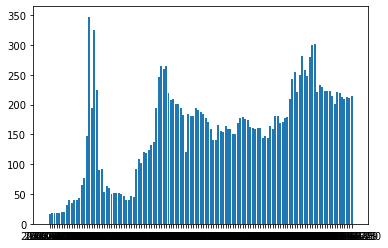

In [36]:

prices['move'] = prices.apply(lambda row: 1 if (row.close > + row.open) else -1, axis=1)
plt.bar(prices['date'], prices['close'])
prices.head()

prices['pricemonth'] = merged.apply(lambda row: row.date[5:7], axis=1)
prices.head()

prices.loc[prices['pricemonth'].isin(['03','04'])].groupby('move').count()

In [4]:
comments = pd.DataFrame()

comments = comments.append(jan_comments)
comments = comments.append(feb_comments)
comments = comments.append(mar_comments)
comments = comments.append(apr_comments)
comments = comments.append(may_comments)
comments = comments.append(jun_comments)

In [5]:
from_zone = tz.gettz('UTC')
to_zone = tz.gettz('America/New_York')

comments['utc_dt'] = comments.apply(lambda row: datetime.strptime(row.created_utc, '%Y-%m-%dT%H:%M:%SZ').replace(tzinfo=from_zone), axis=1)


comments['eastern_dt'] = comments.apply(lambda row: row.utc_dt.astimezone(to_zone), axis=1)

comments['date'] = comments.apply(lambda row: row.eastern_dt.date().strftime('%Y-%m-%d') if 
                                  ((row.eastern_dt.hour > 10 and row.eastern_dt.hour < 16) or
                                  (row.eastern_dt.hour == 9 and row.eastern_dt.minute > 30)) else '', axis=1)
comments['tomorrow'] = comments.apply(lambda row: (row.eastern_dt+timedelta(days=1)).date().strftime('%Y-%m-%d') if 
                                  ((row.eastern_dt.hour > 10 and row.eastern_dt.hour < 16) or
                                  (row.eastern_dt.hour == 9 and row.eastern_dt.minute > 30)) else '', axis=1)

open_comments = comments.loc[comments['date'] != '']


In [7]:
counts = open_comments.groupby('date').count()

counts = counts.reset_index()

counts['count'] = counts['body']

counts = counts[['date', 'count']]

merged = prices.merge(counts, on='date')


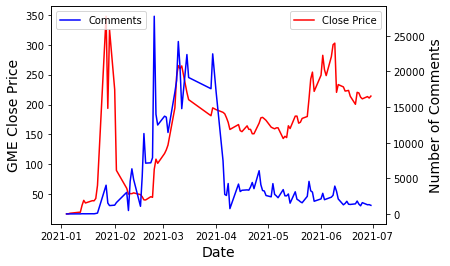

In [8]:
merged['date_dt'] = merged.apply(lambda row: datetime.strptime(row.date, '%Y-%m-%d'),axis=1)

fig,ax = plt.subplots()
ax.plot(merged['date_dt'], merged['close'], color="red",label="Close Price")
plt.legend()
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("GME Close Price",fontsize=14)
ax2=ax.twinx()
ax2.plot(merged['date_dt'], merged['count'],color="blue", label="Comments")
ax2.set_ylabel("Number of Comments",fontsize=14)
plt.legend(loc='upper left')
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

In [12]:
merged.groupby('move').agg({'count' : ['mean','std']})

#merged.groupby('move').count()

merged.head()

,Unnamed: 0,afterHours,close,date,high,open,preMarket,status,volume,move,count,date_dt
0,0,17.3700,17.25,2021-01-04,17.1500,19.00,19.10,OK,10092135.0,-1,2,2021-01-04
1,0,17.5800,17.37,2021-01-05,17.2300,17.35,17.25,OK,5019394.0,1,3,2021-01-05
2,0,18.6999,18.36,2021-01-06,17.3300,17.34,17.51,OK,6112481.0,1,2,2021-01-06
3,0,20.1000,19.94,2021-01-11,19.0100,19.41,17.50,OK,15189190.0,1,9,2021-01-11
4,0,20.1500,19.95,2021-01-12,19.3168,19.96,20.10,OK,7160540.0,-1,5,2021-01-12


In [19]:
merged['month'] = merged.apply(lambda row: row.date_dt.month, axis=1)

merged.loc[merged['month'].isin([3,4])].groupby('move').agg({'count' : ['mean','std']})



count             
           mean          std
move                        
-1     7269.125  7667.227720
 1    12175.800  6932.167598

In [20]:
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab

tokenizer = get_tokenizer('basic_english')

open_comments['tokenized'] = open_comments.apply(lambda row : tokenizer(str(row.body)), axis = 1)
open_comments['length'] = open_comments.apply(lambda row : len(row.tokenized), axis = 1)

C:\Users\Daniel\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Daniel\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
merged_comments = open_comments.merge(prices, on='date')
merged_comments.groupby('move').agg({'length' : ['mean','std']})
#merged_comments.agg({'length' : ['mean','std']})

#merged_comments[merged_comments['body'].str.contains("moon", na=False)]

length           
           mean        std
move                      
-1    24.387667  37.132961
 1    23.266855  35.918971

In [28]:
#merged_comments = open_comments.merge(prices, on='date')
#merged_comments.groupby('move').agg({'length' : ['mean','std']})
merged_comments['month'] = merged_comments.apply(lambda row: row.eastern_dt.month, axis=1)

merged_comments.loc[merged_comments['month'].isin([3,4])].groupby('move').agg({'length' : ['mean','std']})

length           
           mean        std
move                      
-1    24.616985  36.973985
 1    24.064663  37.393602

In [18]:
sorted_comments = merged_comments.sort_values('created_utc')

cutoff = int(len(sorted_comments)*0.8)

train_big = sorted_comments.iloc[:cutoff]

test_big = sorted_comments.iloc[cutoff:]

sorted_comments['month'] = sorted_comments.apply(lambda row: row.eastern_dt.month, axis=1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [26]:
small_set = sorted_comments.loc[sorted_comments['month'].isin([3,4])]

cutoff = int(len(small_set)*0.8)

train_small = small_set.iloc[:cutoff]

test_small = small_set.iloc[cutoff:]

In [27]:
train_big.to_csv("train_big_same_date.csv")
train_small.to_csv("train_small_same_date.csv")
test_big.to_csv("test_big_same_date.csv")
test_small.to_csv("test_small_same_date.csv")

In [37]:
train_dev = small_set.sample(10000)
test_dev = small_set.sample(2000)

train_dev.to_csv("train_dev_same_date.csv")
test_dev.to_csv("test_dev_same_date.csv")

2000